### 2.3. Linear regression
Suppose we have a large set of measurement data $\left(x_{i}, y_{i}\right)_{0 \leq i \leq N}$ and want to analyze the dependence of $y_{i}$ on $x_{i} . x_{i}$ is a controlled and perfectly known input. $y_{i}$ is the result of an experiment observed for the input $x_{i}$ and suffers from measurement errors, $e_{i}$.

The task is to compute a linear fit through all given data points via simple linear regression, i.e., the model $y=\alpha x+\beta$, where $\alpha$ and $\beta$ need to be determined. Given $\left(x_{i}, y_{i}\right)$, the slope of the regression line can be computed via linear least squares as
$$
\alpha=\frac{\sum_{i=0}^{N}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=0}^{N}\left(x_{i}-\bar{x}\right)^{2}}
$$
with the mean values $\bar{x}=\frac{1}{N} \sum_{i=0}^{N} x_{i}$ and $\bar{y}=\frac{1}{N} \sum_{i=0}^{N} y_{i}$. 

The intercept is given by
$$
\beta=\bar{y}-\alpha \bar{x} .
$$

#### Without uring NumPy array functions:
1. Generate the data as follows: $x_{i}=\frac{i}{N}$ for $i=0, \ldots, N$ and $y_{i}=x_{i}+e_{i}$, where the error $e_{i}$ is normally distributed with zero mean and standard deviation $\sigma$ (use the function gauss from the package random). Store $x_{i}$ and $y_{i}$ in lists. Generate two plots with two different values of $\sigma, \sigma=0.2$ and $\sigma=0.4$. Add axis labels, legend and title. Use here $N=30$.

In [108]:
#importing libraries
import random
import matplotlib.pyplot as plt
import numpy as np
import time

In [109]:
#data generation function with gauss err
def return_x_y(N, mean, sigma):
    x = []
    y = []
    for i in range(N):
        x.append(i/N)
        e = random.gauss(mean, sigma)
        y.append(i/N + e)
    return x, y

In [110]:
#initializing input
N = 30
mean = 0
sigma1 = 0.2
sigma2 = 0.4

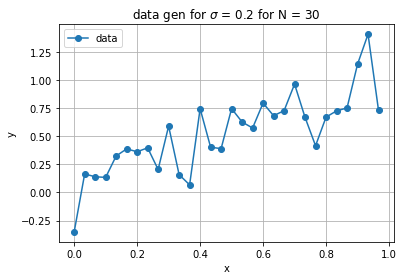

In [111]:
#data generation
x1, y1 = return_x_y(N, mean, sigma1)
#plotting
fig = plt.figure()
plt.plot(x1, y1, '-o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data gen for $\sigma$ = 0.2 for N = 30')
plt.legend(['data'])
plt.grid()
fig.savefig('sigma02')
plt.show()

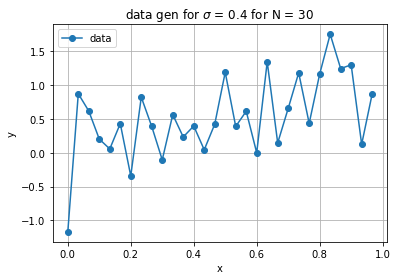

In [112]:
#data generation
x2, y2 = return_x_y(N, mean, sigma2)
#plotting
fig = plt.figure()
plt.plot(x2, y2, '-o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data gen for $\sigma$ = 0.4 for N = 30')
plt.legend(['data'])
plt.grid()
fig.savefig('sigma04')
plt.show()

2. Write a function that takes these data as arguments and computes the linear regression using the formulas above. Plot the points $\left(x_{i}, y_{i}\right)$, the regression line, and the line $y=x$ for $N=30$ and $\sigma=0.4$. Add axis labels, legend and title.

In [113]:
#calc lin reg without numpy
def linreg_calc(x, y):
    N = len(x)
    x_mean = sum(x) / N
    y_mean = sum(y) / N
    top = 0 
    bottom = 0
    #calculating alpha, beta
    for i in range(N):
        top += (x[i] - x_mean) * (y[i] - y_mean)
        bottom += (x[i] - x_mean) **2
    alpha = top / bottom
    beta = y_mean - alpha * x_mean
    return alpha, beta

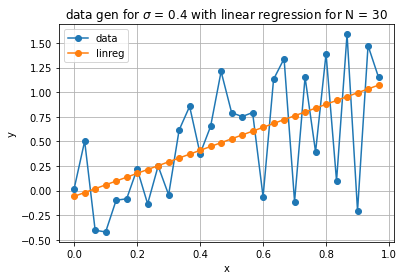

In [114]:
#initializing input
N = 30
mean = 0
sigma = 0.4
#data gen
x, y = return_x_y(N, mean, sigma)
alpha, beta = linreg_calc(x, y)
linreg = []
for i in range(N):
    linreg.append(alpha * x[i] + beta)
#plotting
fig = plt.figure()
plt.plot(x, y, '-o')
plt.plot(x, linreg, '-o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data gen for $\sigma$ = 0.4 with linear regression for N = 30')
plt.legend(['data', 'linreg'])
plt.grid()
fig.savefig('sigma04')
plt.show()

3. Verify that the regression line converges to the line $y=x$ when $N \rightarrow \infty$ and when $\sigma \rightarrow 0$.

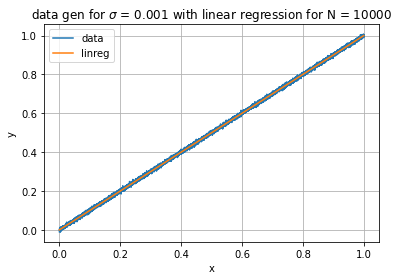

In [105]:
#initializing input
N = 10000
mean = 0
sigma = 0.005
x, y = return_x_y(N, mean, sigma)
alpha, beta = linreg_calc(x, y)
linreg = []
for i in range(N):
    linreg.append(alpha * x[i] + beta)
#plotting
fig = plt.figure()
plt.plot(x, y)
plt.plot(x, linreg)
plt.xlabel('x')
plt.ylabel('y')
plt.title('data gen for $\sigma$ = 0.001 with linear regression for N = 10000')
plt.legend(['data', 'linreg'])
plt.grid()
fig.savefig('sigma04')
plt.show()

#### Using ONLY NumPy array functions:
1. Write a second function that implements the linear regression more effieiently by only using NumPy arrays. Use the same generated data, but converted to NumPy arrays before, and verify that the results are exactly the same as without python arrays.

In [101]:
#initializing input
N = int(2e6)
mean = 0
sigma = 0.4
x, y = return_x_y(N, mean, sigma)
x_np = np.array(x)
y_np = np.array(y)

In [102]:
# linreg function using numpy
def linreg_calc_np(x, y):
    N = len(x)
    x_mean = np.sum(x) / N
    y_mean = np.sum(y) / N
    top = 0
    bottom = 0
    #calculating alpha, beta
    xdif = (x - x_mean)
    top = np.sum(xdif * (y - y_mean))
    bottom = np.sum(xdif**2)
    alpha = top / bottom
    beta = y_mean - alpha * x_mean
    return alpha, beta

2. Compare the speed of both versions. Create a big data set $(\mathrm{N}=$ int $(2 e 6))$, and call each of the not-NumPy and NumPy using functions using time.time(). Verify that the NumPy version should run at least an order of magnitude faster.

In [103]:
#calculatimg without numpy
t_start = time.time()
alpha, beta = linreg_calc(x, y)
linreg = []
for i in range(N):
    linreg.append(alpha * x[i] + beta)
t_end = time.time()
print('time_emplased:', t_end - t_start)

time_emplased: 0.8456602096557617


In [104]:
#calculatimg with numpy
t_start = time.time()
alpha, beta = linreg_calc_np(x_np, y_np)
linreg_np = np.zeros(N)
linreg_np = alpha * x_np + beta
t_end = time.time()
print('time_emplased:', t_end - t_start)

time_emplased: 0.05097770690917969


#### 2.4. Conservation laws in moving domains
Reproduce the computations from reading-conservation laws.pdf.

Let consider a time-varying control volume $\Omega=\Omega(t)$ with boundary $\partial \Omega$ and its normal vector $\boldsymbol{n}$, given by the mapping $\boldsymbol{y}=\boldsymbol{y}(X, t)$ from a reference configuration $\widehat{\Omega}$, namely
$$
\Omega=\left(I_{\widehat{\Omega}}+\boldsymbol{y}\right)(\widehat{\Omega}, t), \hat{\boldsymbol{w}}(X, t)=\partial_{t} \boldsymbol{y}(X, t)=\partial_{t} x(X, t)=\boldsymbol{w}(x, t)
$$
and let us denote $\boldsymbol{u}$ the velocity of an infinitesimal particle at a point $x \in \Omega$, with $x(X, t)=X+\boldsymbol{y}(X, t)$.
Let $L=L(x(t), t)=\hat{L}(X, t)$ be a quantity to be conserved (for example the impluse $L=\rho \boldsymbol{u}, \operatorname{mass} L=\rho$ or energy density $\rho\|\boldsymbol{u}\|^{2}$, with $\boldsymbol{u}(x(X, t), t)$. The general conservation law state that
$$
\partial_{t} \int_{\Omega} L+\int_{\partial \Omega} L(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{n}+\int_{\partial \Omega} Q_{b}+\int_{\Omega} Q_{v}=0 \qquad\qquad\qquad\qquad\qquad (1)
$$
with $Q_{b}$ and $Q_{v}$ boundary and volume source terms, respectively. We now will make use of the divergence theorem, namely
$$
\int_{\partial \Omega} \boldsymbol{u} \cdot \boldsymbol{n}=\int_{\Omega} \boldsymbol{\nabla} \cdot \boldsymbol{u},[\boldsymbol{\nabla}]_{i}=\frac{\partial}{\partial x_{i}}, i=1, \ldots, d
$$
and the so-called geomelric conservalion law
$$
\partial_{t} \int_{\Omega}=\int_{\partial \Omega} \boldsymbol{w} \cdot \boldsymbol{n} \Rightarrow \partial_{t} J(X, t)=J \nabla \cdot \boldsymbol{w}(x, t) \qquad\qquad\qquad\qquad\qquad\qquad (2)
$$
with
$$
J(X, t)=\operatorname{det}(\boldsymbol{F}(X, t)), \boldsymbol{F}(X, t)=\frac{\partial x}{\partial X}=\mathbb{1}+\widehat{\boldsymbol{\nabla}} \boldsymbol{y}(X, t),[\widehat{\boldsymbol{\nabla}}]_{i}=\frac{\partial}{\partial X_{i}}, i=1, \ldots, d
$$
Note that the term $\boldsymbol{\nabla} \cdot \boldsymbol{w}$ is expressed in the coordinates $x$, but it has also a representation in $X$. However, for deriving the conservation laws, we do not need that representation.
We will assume now the structure $Q_{b}=\boldsymbol{b} \cdot \boldsymbol{n}$. Hence, we can conveniently rewrite (1) as
$$
\begin{aligned}
\int_{\widehat{\Omega}} \partial_{t}(\hat{L} J)+\int_{\Omega} \boldsymbol{\nabla} \cdot(L(\boldsymbol{u}-\boldsymbol{w})) &=\int_{\partial \Omega} Q_{b}+\int_{\Omega} Q_{v} \qquad\qquad (3)\\
\int_{\widehat{\Omega}}\left(\partial_{t} \hat{L} J+L J \boldsymbol{\nabla} \cdot \boldsymbol{w}+\int_{\Omega} \boldsymbol{\nabla} \cdot(L(\boldsymbol{u}-\boldsymbol{w}))\right) &=\int_{\partial \Omega} Q_{b}+\int_{\Omega} Q_{v} \qquad\qquad (4) \\
\int_{\Omega}\left(\partial_{t} L+L \boldsymbol{\nabla} \cdot \boldsymbol{w}+\boldsymbol{\nabla} \cdot(L(\boldsymbol{u}-\boldsymbol{w}))\right) &=\int_{\partial \Omega} Q_{b}+\int_{\Omega} Q_{v} \qquad\qquad (5) \\
\int_{\Omega}\left(\partial_{t} L+L \boldsymbol{\nabla} \cdot \boldsymbol{w}+L \boldsymbol{\nabla} \cdot(\boldsymbol{u}-\boldsymbol{w})+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla} L\right) &=\int_{\partial \Omega} Q_{b}+\int_{\Omega} Q_{v} \qquad\qquad (6) \\
\int_{\Omega}\left(\partial_{t} L+L \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla} L-\boldsymbol{\nabla} \cdot \boldsymbol{b}\right) &=\int_{\Omega} Q_{v} \qquad\qquad\qquad\quad (7)
\end{aligned} 
$$
and since this relation has to be true for all $\Omega$ it leads to the differential formulations
$$
\partial_{t} L+L \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla} L-\boldsymbol{\nabla} \cdot \boldsymbol{b}=0 \text { in } \Omega \qquad\qquad\qquad\qquad\qquad\qquad (8)
$$
In the case of the mass conservation, (1) reads
$$
\partial_{t} \rho+\rho \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla} \rho=0 \text { in } \Omega \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (9)
$$
with $Q_{b}=Q_{v}=0$.\\
The momentum conservation in the $i-t h$ direction reads $\left(\boldsymbol{b}=\boldsymbol{\sigma}_{i,:}, Q_{v}=\boldsymbol{f}_{i}\right)$
$$
\partial_{t}\left(\rho \boldsymbol{u}_{i}\right)+\left(\rho \boldsymbol{u}_{i}\right) \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla}\left(\rho \boldsymbol{u}_{i}\right)-\boldsymbol{\nabla} \cdot \boldsymbol{\sigma}_{i,:}=\boldsymbol{f}_{i} \text { in } \Omega . \qquad\qquad\qquad\qquad(10)
$$
Note that we can we can write up all terms obtaining
$$
\begin{array}{r}
\partial_{t}(\rho) \boldsymbol{u}_{i}+\rho \partial_{t}\left(\boldsymbol{u}_{i}\right)+\rho \boldsymbol{u}_{i} \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla}(\rho) \boldsymbol{u}_{i}+\rho(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla}\left(\boldsymbol{u}_{i}\right)-\boldsymbol{\nabla} \cdot \boldsymbol{\sigma}_{i,:}=\boldsymbol{f}_{i} \text { in } \Omega \\
\boldsymbol{u}_{i}\left(\partial_{t} \rho+\rho \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla} \rho\right)+\rho \partial_{t}\left(\boldsymbol{u}_{i}\right)+\rho(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla}\left(\boldsymbol{u}_{i}\right)-\boldsymbol{\nabla} \cdot \boldsymbol{\sigma}_{i,:}=\boldsymbol{f}_{i} \text { in } \Omega \\
\rho \partial_{t}\left(\boldsymbol{u}_{i}\right)+\rho(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla}\left(\boldsymbol{u}_{i}\right)-\boldsymbol{\nabla} \cdot \boldsymbol{\sigma}_{i,:}=\boldsymbol{f}_{i} \text { in } \Omega
\end{array}
$$
where from the second to the third line the general mass conservation equation (9) was used.\\
Finally, the energy density conservation reads $\left(Q_{b}=Q_{v}=0\right)$
$$
\partial_{t}\left(\rho\|\boldsymbol{u}\|^{2} / 2\right)+\rho\|\boldsymbol{u}\|^{2} / 2 \boldsymbol{\nabla} \cdot \boldsymbol{u}+(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{\nabla}\left(\rho\|\boldsymbol{u}\|^{2} / 2\right)=0 \text { in } \Omega \qquad\qquad\qquad (11)
$$
or in integral form by replacing $L=\rho\|\boldsymbol{u}\|^{2} / 2$ directly in (1)
$$
\partial_{t} \int_{\Omega} \rho\|\boldsymbol{u}\|^{2} / 2+\int_{\partial \Omega} \rho\|\boldsymbol{u}\|^{2} / 2(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{n}=0 \qquad\qquad\qquad\qquad\qquad\qquad (12)
$$
Integrating it in time
$$
\frac{1}{2} \int_{\Omega} \rho\|\boldsymbol{u}\|^{2}=\frac{1}{2} \int_{\widehat{\Omega}} \widehat{\rho} \widehat{\boldsymbol{u}}^{2}-\frac{1}{2} \int_{\widehat{t}}^{t} \int_{\partial \Omega} \rho\|\boldsymbol{u}\|^{2}(\boldsymbol{u}-\boldsymbol{w}) \cdot \boldsymbol{n} \qquad\qquad\qquad\qquad (13)
$$
where $\widehat{\boldsymbol{u}}$ denotes the velocity at $\widehat{t}$, is the energy storage of the internal forces.

#### 3.1. Pulsating channel flow (4 points)
Consider the flow of a fluid through a channel with height L and “infinite” length and width, as discussed in the lecture. Infinite width allows us to consider a 2D model, assuming that the flow is in complete equilibrium and does not change across the width of the channel. The 2D channel is illustrated in Fig. 1.

<figure>
<center>
<img src="./fig1.png" alt="fishy" class="bg-primary mb-1" width="600px" width="480px" title="The heated rod" alt="Figure 1">
<figcaption>
<b>Figure 1:</b>
<i>2D Channel. </i></figcaption>
</center>
</figure>

Suppose that by means of some external mechanism, the pressure gradient of the fluid in the channel is controlled. The pressure gradient in the $z$-direction is constant in space and oscillates in time,
$$
\begin{array}{l}
\frac{\partial p}{\partial z}=-a \sin (\omega t) \quad \text { with } a>0 \\
\frac{\partial p}{\partial x}=0
\end{array}
$$
Under these assumptions, the Navier-Stokes equations reduce to
$$
\rho \frac{\partial u}{\partial t}-\mu \frac{\partial^{2} u}{\partial x^{2}}=a \sin (\omega t)
$$
The vertical velocity component is zero and the shape of the horizontal $(z)$ velocity component $u$ depends only on the vertical coordinate $x$.

The boundary conditions for the velocity in $z$-direction are $u(0, t)=u(L, t)=0$ and the initial condition is given by $u(x, 0)=0 \forall x \in[0, L]$.\\
Then, $u$ can be computed with the following sequence:
$$
u(x, t)=a \sum_{k=0}^{\infty} d_{k} \Psi_{k}(t) S_{k}(x) \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (1)
$$
with
$$
\begin{aligned}
\sigma &=\frac{\mu}{\rho L^{2}} \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad\quad (2)\\
d_{k} &=\frac{4}{\rho \pi(2 k+1)\left((2 k+1)^{4} \sigma^{2} \pi^{4}+\omega^{2}\right)} \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad (3)\\
S_{k}(x) &=\sin \left(\pi(2 k+1) \frac{x}{L}\right) \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad (4)\\
\Psi_{k}(t) &=(2 k+1)^{2} \sigma \pi^{2} \sin (\omega t)-\omega \cos (\omega t)+\omega \exp \left(-(2 k+1)^{2} \sigma \pi^{2} t\right) \qquad\qquad\qquad\qquad\qquad (5)
\end{aligned}
$$
Formulas (1)-(5) compute the full transient behavior of the flow, starting from the initial condition $u=0$.

For the situation where the channel flow is already fully developed, i.e., for $t \gg 0$, the velocity profile has the following periodic solution:
$$
u(x, t)=\frac{a}{\omega \rho}\left[\frac{f_{2}(x)}{f_{3}(x)} \sin (\omega t)-\left(1-\frac{f_{1}(x)}{f_{3}(x)}\right) \cos (\omega t)\right] \qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad (6)
$$
with
$$
\begin{array}{l}
f_{1}(x)=\operatorname{cc}(\kappa(x-L / 2)) \operatorname{cc}(\kappa L / 2)+\operatorname{ss}(\kappa(x-L / 2)) \operatorname{ss}(\kappa L / 2) \\
f_{2}(x)=\operatorname{cc}(\kappa(x-L / 2)) \operatorname{ss}(\kappa L / 2)-\operatorname{ss}(\kappa(x-L / 2)) \operatorname{cc}(\kappa L / 2) \\
f_{3}(x)=\operatorname{cc}^{2}(\kappa L / 2)+\mathrm{ss}^{2}(\kappa L / 2)
\end{array}
$$
and
$$
\begin{aligned}
\operatorname{cc}(x) &:=\cos (x) \cosh (x) \\
\operatorname{ss}(x) &:=\sin (x) \sinh (x) \\
\kappa &=\sqrt{\frac{\omega \rho}{2 \mu}}
\end{aligned}
$$
In the context of biomedical flow, this type of flow (i.e., pulsating channel or pipe flow) is referred to as Womersley flow. It can be characterized by the dimensionless Womersley number,
$$
\alpha=L \sqrt{\frac{\omega \rho}{\mu}}
$$
The constants are given in CGS units as $a=1 \mathrm{~g} /\left(\mathrm{cm} \mathrm{s}^{2}\right), \mu=0.035 \mathrm{~g} /(\mathrm{cm} \mathrm{s}), \rho=$ $1 \mathrm{~g} / \mathrm{cm}^{3}, L=1 \mathrm{~cm}, \omega=1 \mathrm{~s}^{-1}$ for an example of arterial blood flow.

1. **(3 points)** Write functions that compute the velocity profile $u(x, t)$ at any time $t$ (for all $x \in[0, L]$ at once). Implement
 - the transient case via Eq. (1) and
 - the periodic case via Eq. (6).
Make an animated plot (see section A for an example) to visualize the oscillating velocity profiles. Show both solutions in the same figure.



In [20]:
#import of libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

#variables and arrays def
mu = 0.035 #0.035 # 60 sec for arriving to periodic state
#mu = 0.1 # 25 sec for arriving to periodic state

rho = 1.
a = 1.
L = 1.
omega = 1.

T = 10*2*np.pi/omega

alpha = L*np.sqrt(omega*rho/mu)
print('Womersley number: ', alpha)

x = np.linspace(0, L, 40)
t = np.arange(0, T, 0.1)
up = np.zeros(shape=(len(t),len(x)))
ut = np.zeros(shape=(len(t),len(x)))

#function def
def transient(k, t):
    d = 4./(rho*np.pi*(2*k + 1)*((2*k + 1)**4*(mu/rho/L**2)**2*np.pi**4 +
                                 omega**2))
    S = np.sin(np.pi*(2*k + 1)*x/L)
    psi = ((2*k + 1)**2*mu/rho/L**2*np.pi**2*np.sin(omega*t) -
           omega*np.cos(omega*t) +
           omega*np.exp(-(2*k + 1)**2*mu/rho/L**2*np.pi**2*t))

    return a*d*S*psi

def cc(x):
    return np.cos(x)*np.cosh(x)

def ss(x):
    return np.sin(x)*np.sinh(x)

def periodic(t):
    k = np.sqrt(omega*rho/2./mu)
    xs = x - L/2
    f1 = cc(k*xs)*cc(k*L/2) + ss(k*xs)*ss(k*L/2)
    f2 = cc(k*xs)*ss(k*L/2) - ss(k*xs)*cc(k*L/2)
    f3 = cc(k*L/2)**2 + ss(k*L/2)**2
    u = a/omega*(f2/f3*np.sin(omega*t) - (1 - f1/f3)*np.cos(omega*t))
    return u

def ani(i): 
    ptrans.set_data(x, ut[i])
    pper.set_data(x, up[i])
    
#counting
count = 0

for t_ in t:
    ut_var = 0
    for k in range(10):
        ut_var += transient(k, t_)           
    up_var = periodic(t_)
    up[count] = up_var
    ut[count] = ut_var
    count += 1

Womersley number:  5.3452248382484875
629


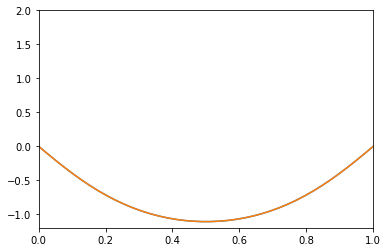

In [19]:
#animating
fig, ax = plt.subplots()
ax.axis([0, L,-1.2, 2])
ptrans,=ax.plot([],[])
pper,=ax.plot([],[])
ani = matplotlib.animation.FuncAnimation(fig, ani, frames=len(t))
from IPython.display import HTML 
HTML(ani.to_jshtml())

2. **(0.5 points)** Above, we stated that the periodic velocity solution (6) is valid for $t \gg 0$. Comparing the results with those of the transient formula (1), after how much time is the periodic solution a good approximation?


3. **(0.5 points)** The constants above were defined for a pulsating blood flow in an artery. Instead of blood, consider a fluid with a higher dynamic viscosity of $\mu=0.1 \mathrm{~g} /(\mathrm{cms})$. Compare the times the transient solution needs to reach equilibrium (the periodic solution). By looking at the transient formula, what is the relationship between the equilibrium time and the viscosity?

#### 3.2. Conservation of angular momentum (5 points)
We saw in the lectures and in the complementary reading that the general conservation law reads:
$$
\partial_{t} L+L \sum_{i=1}^{3} \partial_{x_{i}} \mathbf{u}_{i}+\sum_{k=1}^{3}\left(\mathbf{u}_{k}-\mathbf{w}_{k}\right) \partial_{x_{k}} L-\sum_{\ell=1}^{3} \partial_{x_{\ell}} \mathbf{b}_{\ell}=0 \qquad\qquad\qquad\qquad\qquad\qquad\qquad (7)
$$
The goal is to proof that the Cauchy stresses need to be symmetric, i.e. $\sigma=\sigma^{\top} \in \mathbb{R}^{3 \times 3}$ as stated in the lecture, by assuming that the fluid flow satisfies the conservation of angular momentum. For this we will proceed in some steps:


1. **(1 point)** As you have seen, on a control volume $\Omega$, the vector forces acting on the boundary are $\sigma \mathbf{n}$, and hence the angular momentum vector produced by those forces is $\mathbf{r} \times \sigma \mathbf{n}$, with $\mathbf{r}_{i}=x_{i}(X, t)$ and $\mathbf{w}=\partial_{t} \mathbf{r}$.
In order to use the differential relation (7), we need to convert the external boundary source into a volume source. Therefore, for the $j$-th component of the angular momentum vector, show that:
$$
\int_{\partial \Omega}[\mathbf{r} \times \sigma \mathbf{n}]_{j}=\int_{\Omega} \sum_{\ell=1}^{3} \partial_{x_{\ell}}\left(\left[\mathbf{r} \times \sigma_{:, \ell}\right]_{j}\right) \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (8)
$$
with $\sigma_{:, i}$ the ith-column of $\sigma$ (recall the notations from the lecture and complementary material on conservation laws in moving domains).

2. **(2 points)** Asssume that Equation (7) holds for linear momentum (i,.e for $L=$ $\rho \mathbf{u}_{1}, \rho \mathbf{u}_{2}$ and $\rho \mathbf{u}_{3}$ with $\mathbf{b}_{\ell}=\sigma_{\ell, 1}, \sigma_{\ell, 2}, \sigma_{\ell, 3}$, respectively). Then, prove that if $L=$ $[\mathbf{r} \times \rho \mathbf{u}]_{j}, \mathbf{b}_{i}=\left[\mathbf{r} \times \sigma_{:, i}\right]_{j}$, Equation $(7)$ for $j=1,2,3$ leads to:
$$
\left(\partial_{t} \mathbf{r}\right) \times \rho \mathbf{u}+\left\{\sum_{k=1}^{3}\left(\mathbf{u}_{k}-\mathbf{w}_{k}\right)\left(\partial_{x_{k}} \mathbf{r}\right)\right\} \times \rho \mathbf{u}=\sum_{i=1}^{3}\left(\partial_{x_{i}} \mathbf{r}\right) \times \sigma_{:, i} \qquad\qquad\qquad\qquad\quad (9)
$$

3. **(1 point)** Show now that the left-hand-side of Equation (9) is zero.

4. **(1 point)** Show now that the Cauchy stress matrix is symmetric. You have to deliver all the steps written on paper for grading.

Theorem: angular momentum is conserved if linear momentum too and $\sigma^{T} = \sigma$, i.e. the cauchy stresses are symmetric 

Proof: $<=$ angular momentum vector
$L=[\vec{r} \times \rho \vec{u}]_{j}, \quad \vec{r}=\sum_{i=1}^{3} x_{i} \vec{e}_{i}$

Conservation equation:
(*) $\partial_{t} L+L \nabla \cdot \vec{u}+(\vec{u}-\vec{\omega}) \cdot \nabla L-\nabla \cdot \vec{b}=Q_{v}$

"Source" of angular momentum: $Q_{v} / \vec{b}$? 

<figure>
<center>
<img src="./figure_for_theory.png" alt="fishy" class="bg-primary mb-1" width="600px" width="480px" title="The heated rod" alt="Figure 1">
<figcaption>
<b>Figure 2:</b>
<i> </i></figcaption>
</center>
</figure>

$Q_{v}=M_{j} + [\vec{r} \times \vec{f}]_{j}$

assume $\equiv$ 0

$\int_{\partial\Omega}[\vec{r} \times \sigma \vec{n}]_{j} d s=$

$=\int_{\partial\Omega}[\vec{r} \times \sum_{i=1}^{3} \sigma_{i} \vec{n}_{i}]_{j} d s=$

$=\int_{\partial\Omega}\sum_{i=1}^{3}[\vec{r} \times \sigma_{i}]_{j}\vec{n}_{i} d s=$

$=\int_{\Omega}\sum_{i=1}^{3} \partial_{i}[\vec{r} \times \sigma_{i}]_{j}\vec{n}_{i} d V$

$[\vec{r} \times \sigma_{i}]_{j} = b_{i}$

Inserting everything into (*)

$\partial_{t}\left[\vec{r} \times \rho\vec{u}\right]_{j}+[\vec{r} \times \rho \vec{u}]_{j} \nabla \cdot \vec{u}+(\vec{u}-\vec{\omega}) \cdot \nabla[\vec{r} \times \rho \vec{u}]_{j} -\sum_{i=1}^{3} \partial_{i}\left[\vec{r} \times \vec{\sigma}_{i}\right]_{j}=[\vec{r} \times \vec{f}]_{j}$


Next:

$\left[\partial_{t} \vec{r} \times \rho \vec{u}\right]_{j}+\left[\vec{r} \times d_{t}(\rho \vec{u})\right]_{j} +\left[\vec{r} \times \left(\rho \vec{u}\left(\nabla \cdot \vec{u}\right)\right)\right]_{j}+\sum_{k=1}^{3}\left(u_{k}-\omega_{k}\right)\partial_{k}[\vec{r} \times \rho \vec{u}]_{j}-\sum_{i=1}^{3}\left[\left[\partial_{i} \vec{r} \times \overrightarrow{\sigma_{i}}\right]_{j}+\left[\vec{r} \times \partial_{i} \vec{\sigma}_{i}\right]_{j}\right] = [\vec{r} \times \vec{f}]_{j}$

Then, regrouping and expanding the rest:

$\left[\vec{r} \times\left\{\partial_{t}(\rho \vec{u})+\rho \vec{u} \nabla \cdot \vec{u}-\sum_{i=1}^{3} \partial_{i} \vec{\sigma}_{i}-\vec{f}\right\}\right]_{j}+\vec{\omega} \times \rho \vec{u}+\left[\sum_{k=1}^{3}\left(u_{k}-\omega_{k}\right)\left\{\partial_{k} \vec{r} \times \rho\vec{u}+\vec{r} \times \partial_{k}\left(\rho \vec{u}\right)\right\}\right]_{j}-\left[\sum_{i=1}^{3} \partial_{i} \vec{r} \times \sigma_{i}\right]_{j}=0$

If linear monentum conservatron (LCM) then also $\vec{r} \times LMC = 0$ . Then

$\vec{\omega} \times \rho \vec{u}+\sum_{k=1}^{3}\left(u_{k}-\omega_{k}\right) \partial_k \vec{r} \times \rho\vec{u}=\sum_{i=1}^{3} \partial_{i} \vec{r} \times \vec{\sigma_{i}}$

Note that $\partial_{i}\vec{r}=\vec{e}_{i}$

In fact, the left-hand-side is zero:

$\left(u_{1}-\omega_{1}\right) \vec{e}_{1} \times\left(\rho u_{1} \vec{e}_{1}+\rho u_{2} \vec{e}_{2}+p u_{3} \vec{e}_{3}\right) +\left(u_{2}-w_{2}\right) \vec{e}_{2} \times(\cdots)+\left(u_{3}-w_{3}\right) \vec{e}_{3}(\cdots)= u_{1} u_{2} \overrightarrow{e_{3}}-u_{1} u_{3} \vec{e}_{2}-u_{2} u_{1} \vec{e}_{3}+u_{2} u_{3}\vec{e}_{1}+u_{3} u_{1} \vec{e}_{2}-u_{3} x_{2} e_{1}$

$\equiv-\vec{\omega} \times \rho \vec{u} .$

Hence
$
\vec{e}_{1} \times\left(\sigma_{11} \vec{e}_{1}+\sigma_{21} \vec{e}_{2}+\sigma{ }_{31} \vec{e}_{3}\right) +\vec{e}_{2} \times\left(\sigma_{12} \vec{e_{1}}+\sigma_{22} \vec{e}_{2}+\sigma_{32} \vec{e_{3}}\right)+\vec{e}_{3} \times\left(\sigma_{13} \vec{e_{1}}+\sigma_{23} \vec{e}_{2}+\sigma_{33} \vec{e_{3}}\right) = 0
$

Computing the gross-products results:
$\sigma_{21} \vec{e}_{3}-\sigma_{31} \vec{e}_{2}-b_{12} \vec{e}_{3}+\sigma_{32} \vec{e}_{1} +\sigma_{23} \vec{e}_{2}-\sigma_{23} \vec{e}_{1}=0$

$\Leftrightarrow \sigma_{13} = \sigma_{31}, \sigma_{21} = \sigma_{12}, \sigma_{32} = \sigma_{23}$ 

Proof $\Rightarrow:$ Start with symmetry and go back adding zero